For the point of view of the Renter :
    
    What is the cheapiest neighborhood to stay in  Boston?
    What is the busiest neighborhood to stay in  Boston?
    What is the busiest month to visit  Boston?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('Boston/listings.csv')

listing_data = pd.read_csv('boston/listings.csv', sep = ',')
calender_data = pd.read_csv('boston/calendar.csv', sep = ',')
review_data = pd.read_csv('boston/reviews.csv', sep = ',')


listing_data.shape

(3818, 92)

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [4]:
listing_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
listing_data.describe(include = 'object')

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3818,3818,3818,3641,3249,3818,3818,2786,2212,2884,3498,3498,3818,3498,3818,3816,3816,3810,2959,3295,3295,3045,3816,3816,3816,3518,3818,3816,3816,3818,3402,3818,3818,3818,3818,3811,3818,3818,3818,3818,3818,3817,3818,3818,3818,3818,2009,1517,1866,2788,3818,3818,3818,3818,3191,3191,3818,3818,3818,3818,3818,3818
unique,3818,1,3792,3478,3119,3742,1,2506,1999,2574,3498,3498,3818,3498,2751,1466,1380,120,2011,4,45,2,2,2743,2743,102,116,2,2,1442,81,87,17,7,2,28,1,7,1,1,2,16,3,5,3284,273,395,356,46,118,45,34,1,1,984,321,1,1,2,3,2,2
top,https://www.airbnb.com/rooms/7763298,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,https://a0.muscache.com/ac/pictures/104620411/...,https://a0.muscache.com/im/pictures/95525037/5...,https://a0.muscache.com/ac/pictures/93935855/e...,https://a2.muscache.com/ac/pictures/be546583-4...,https://www.airbnb.com/users/show/8534462,Andrew,2013-08-30,"Seattle, Washington, United States",It would be my pleasure to share and explore t...,within an hour,100%,100%,f,https://a2.muscache.com/ac/pictures/a4d7d053-c...,https://a2.muscache.com/ac/pictures/a4d7d053-c...,Capitol Hill,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"1st Avenue, Seattle, WA 98101, United States",Capitol Hill,Broadway,Other neighborhoods,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,Real Bed,{},$150.00,$500.00,"$2,500.00",$100.00,$50.00,$0.00,today,t,2016-01-04,2015-09-21,2016-01-02,f,WASHINGTON,f,strict,f,f
freq,1,3818,3,15,14,10,3818,17,39,32,1,1,1,1,46,56,51,3259,46,1692,2371,3044,3038,46,46,405,595,3809,2997,30,351,397,794,3810,3817,420,3818,3810,3818,3818,3412,1733,2541,3657,45,162,94,66,348,310,2048,706,3818,3818,25,94,3818,3818,3227,1417,3497,3443


In [6]:
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Text(0.5, 1.0, 'Numbers in Each Neigbourhoods')

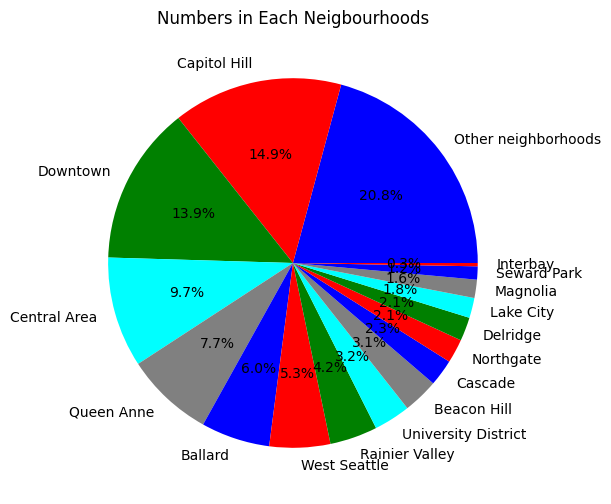

In [7]:
plt.figure(figsize=(6,6))
numbers = listing_data['neighbourhood_group_cleansed'].value_counts()
plt.pie(numbers.values, labels=numbers.index, colors=['b', 'r', 'g', 'cyan', 'gray'], autopct='%1.1f%%')
plt.title('Numbers in Each Neigbourhoods')

In [8]:
calender_data.shape

(1393570, 4)

In [9]:
calender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [10]:
calender_data.rename(columns = {'listing_id':'id'}, inplace = True)

In [11]:
calender_data.id.value_counts()

9484823     365
5433597     365
7984550     365
8441477     365
9048029     365
           ... 
479653      365
10310373    365
4672934     365
1259305     365
6752031     365
Name: id, Length: 3818, dtype: int64

In [12]:
target_columns = [ "street", "neighbourhood", "neighbourhood_cleansed","neighbourhood_group_cleansed", "city", "state", "zipcode", "market","smart_location",'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact' ]
data = pd.concat([calender_data, listing_data[target_columns]], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1393570 non-null  int64  
 1   date                          1393570 non-null  object 
 2   available                     1393570 non-null  object 
 3   price                         934542 non-null   object 
 4   street                        3818 non-null     object 
 5   neighbourhood                 3402 non-null     object 
 6   neighbourhood_cleansed        3818 non-null     object 
 7   neighbourhood_group_cleansed  3818 non-null     object 
 8   city                          3818 non-null     object 
 9   state                         3818 non-null     object 
 10  zipcode                       3811 non-null     object 
 11  market                        3818 non-null     object 
 12  smart_location              

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


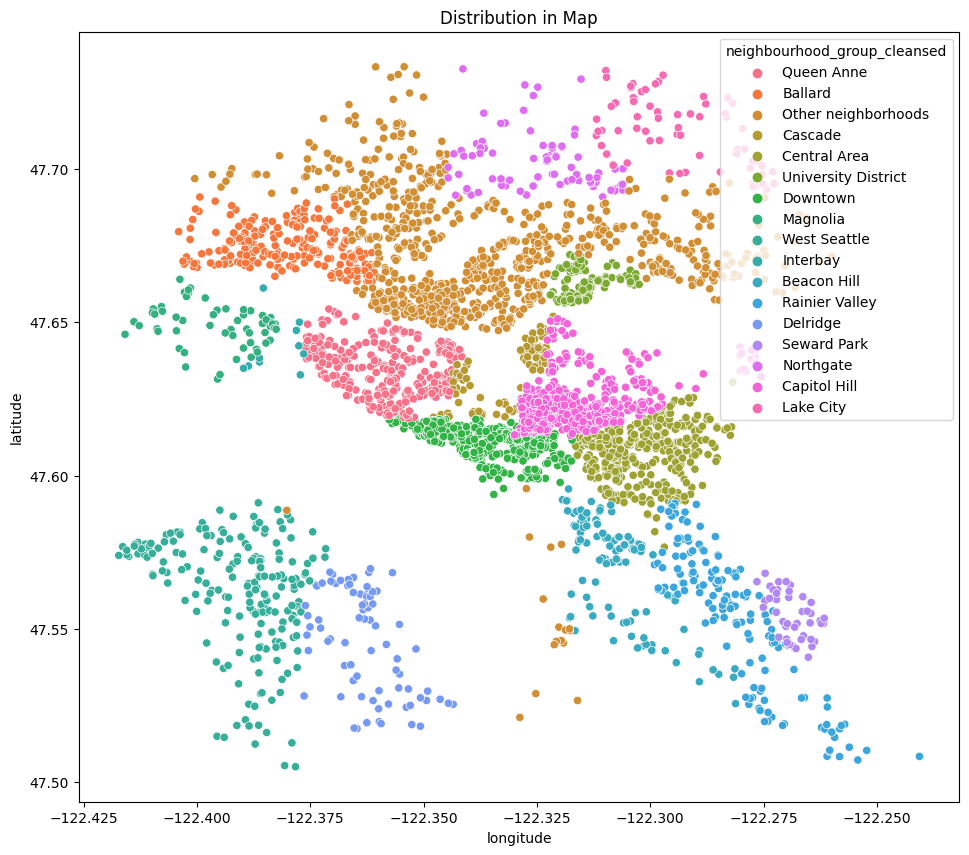

In [56]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(121)
sns.scatterplot(data['longitude'], data['latitude'], hue=data['neighbourhood_group_cleansed'], ax=ax1)
ax1.set_title('Distribution in Map')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


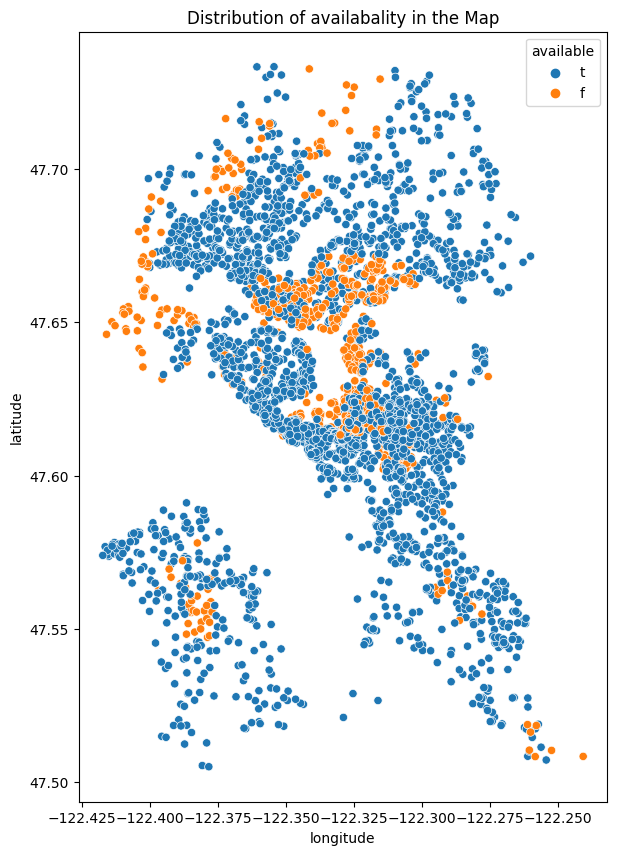

In [57]:
fig = plt.figure(figsize=(15,10))
ax2 = fig.add_subplot(122)
sns.scatterplot(data['longitude'], data['latitude'], hue=data['available'], ax=ax2)
ax2.set_title('Distribution of availabality in the Map')
plt.show()

In [14]:
filt =(data['available'].str.contains('t',na=False))
filt
#filt.groupby(['neighbourhood_group_cleansed']).count()
#data.loc[data.groupby(['neighbourhood_group_cleansed']).count(),filt]

0           True
1           True
2          False
3          False
4          False
           ...  
1393565    False
1393566    False
1393567    False
1393568    False
1393569    False
Name: available, Length: 1393570, dtype: bool

In [15]:

data.groupby(['neighbourhood_group_cleansed']).count()

,id,date,available,price,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact
neighbourhood_group_cleansed,,,,,,,,,,,,,,,,,
Ballard,230,230,230,216,230,211,230,230,230,229,230,230,230,230,230,230,230
Beacon Hill,118,118,118,118,118,95,118,118,118,118,118,118,118,118,118,118,118
Capitol Hill,567,567,567,276,567,510,567,567,567,565,567,567,567,567,567,567,567
Cascade,89,89,89,21,89,75,89,89,89,89,89,89,89,89,89,89,89
Central Area,369,369,369,293,369,332,369,369,369,368,369,369,369,369,369,369,369
Delridge,79,79,79,79,79,71,79,79,79,79,79,79,79,79,79,79,79
Downtown,530,530,530,420,530,472,530,530,530,529,530,530,530,530,530,530,530
Interbay,11,11,11,10,11,9,11,11,11,10,11,11,11,11,11,11,11
Lake City,67,67,67,67,67,59,67,67,67,67,67,67,67,67,67,67,67


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


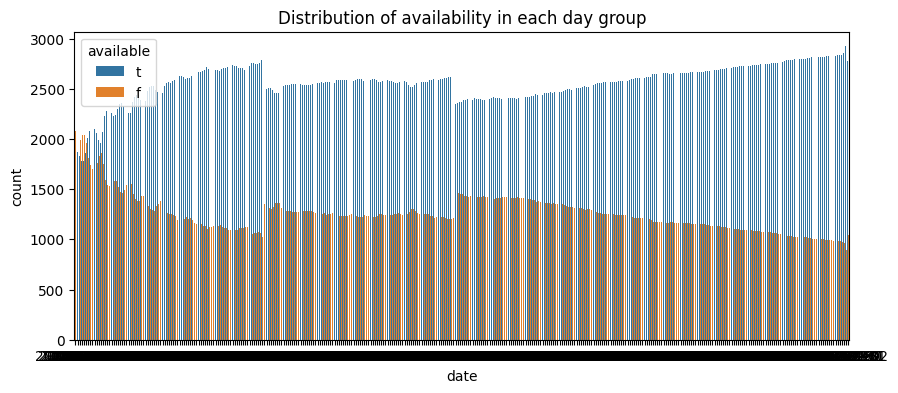

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(data['date'], hue=data['available'])
plt.title('Distribution of availability in each day group')
plt.show()

In [17]:
data['price'] = data['price'].astype(str)
data['price'] = data['price'].str.replace("[$, ]", "").astype("float")
    
#get the average price for each listing
mean_price_for_listing = data.groupby('id').mean()['price']

/var/folders/wc/83kn_8c56bv2ndnbw_g3dl3w0000gn/T/ipykernel_1007/647578219.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['price'] = data['price'].str.replace("[$, ]", "").astype("float")


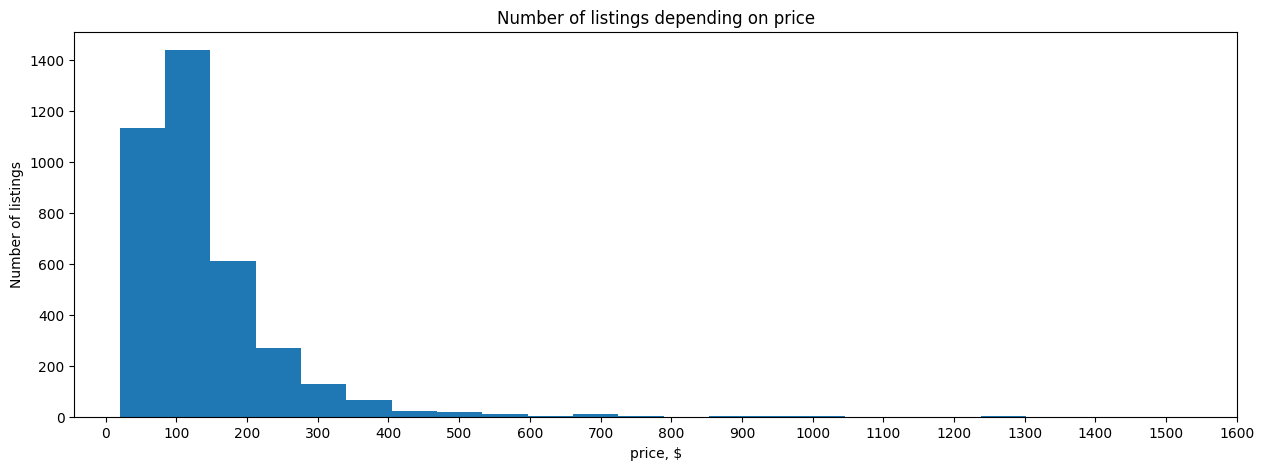

In [18]:
#plot
plt.figure(figsize=(15,5))
plt.hist(mean_price_for_listing, bins=20)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('price, $')
plt.title('Number of listings depending on price')


plt.savefig('Price distrubution.png')

plt.show()

In [19]:
def get_month_from_date(row):
    ''' Get month from date represented as a string '''
    return int(row['date'].split('-')[1])

def get_year_from_date(row):
    ''' Get year from date represented as a string '''
    return int(row['date'].split('-')[0])
#convert date from the calendar into month and drop the date colum
data['month'] = data.apply(lambda row: get_month_from_date(row),axis=1)
data['year'] = data.apply(lambda row: get_year_from_date(row),axis=1)
#data = data.drop(columns = ['date'])

In [20]:
#find number of total number of listings for each month in 2016
number_of_listings_by_month = pd.Series([12])
for i in range(1, 13):
    number_of_listings_by_month[i] = len(data[(data['month'] == i)]['id'].unique())
    
number_of_listings_by_month = number_of_listings_by_month.drop(0)

number_of_listings_by_month

1     3818
2     3818
3     3818
4     3818
5     3818
6     3818
7     3818
8     3818
9     3818
10    3818
11    3818
12    3818
dtype: int64

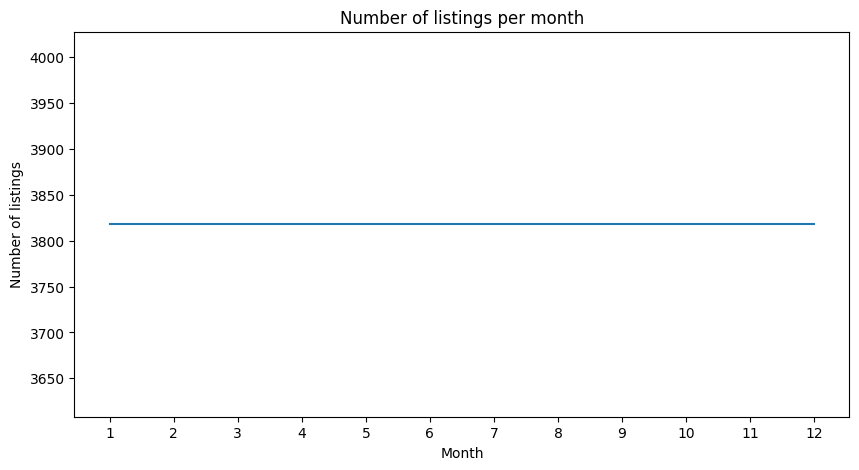

In [21]:
#find number of total number of listings for each month in 2016
number_of_listings_by_month = pd.Series([12])
for i in range(1, 13):
    number_of_listings_by_month[i] = len(data[(data['month'] == i)]['id'].unique())
    
number_of_listings_by_month = number_of_listings_by_month.drop(0)

#plot
plt.figure(figsize=(10,5))
plt.plot(number_of_listings_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings per month')

plt.savefig('number of available listings.png')

plt.show()

In [35]:
nhg=data.neighbourhood_group_cleansed.unique()

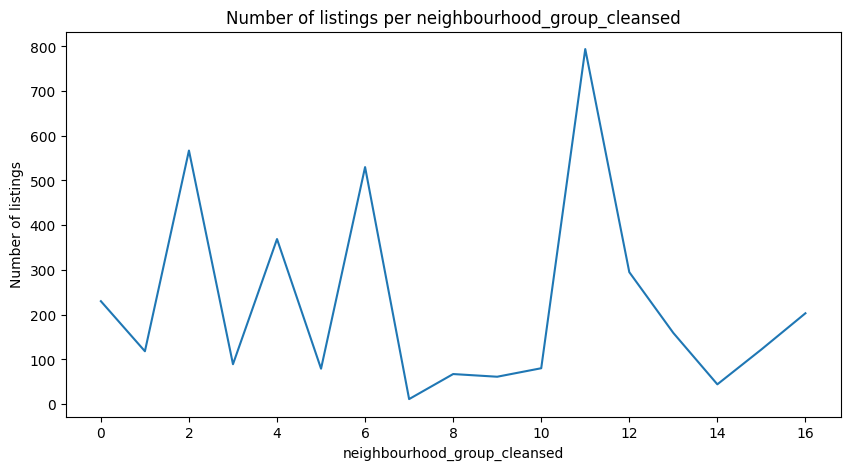

In [39]:
#find number of total number of listings for each neighbourhood_group_cleansed
df1=data.groupby(['neighbourhood_group_cleansed']).count()
number_of_listings_by_neighbourhood_group_cleansed = df1['id'].unique()
    
nb=data.neighbourhood_group_cleansed.unique()
#plot
plt.figure(figsize=(10,5))
plt.plot(number_of_listings_by_neighbourhood_group_cleansed)
#plt.xticks(range(len(nhg)), x_axis, size='small')
plt.ylabel('Number of listings')
plt.xlabel('neighbourhood_group_cleansed')
plt.title('Number of listings per neighbourhood_group_cleansed')

plt.savefig('number of available listings.png')

plt.show()

In [45]:
least_price = data.groupby('neighbourhood')['price'].mean().sort_values(ascending=True).head(20)
Highest_price = data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)

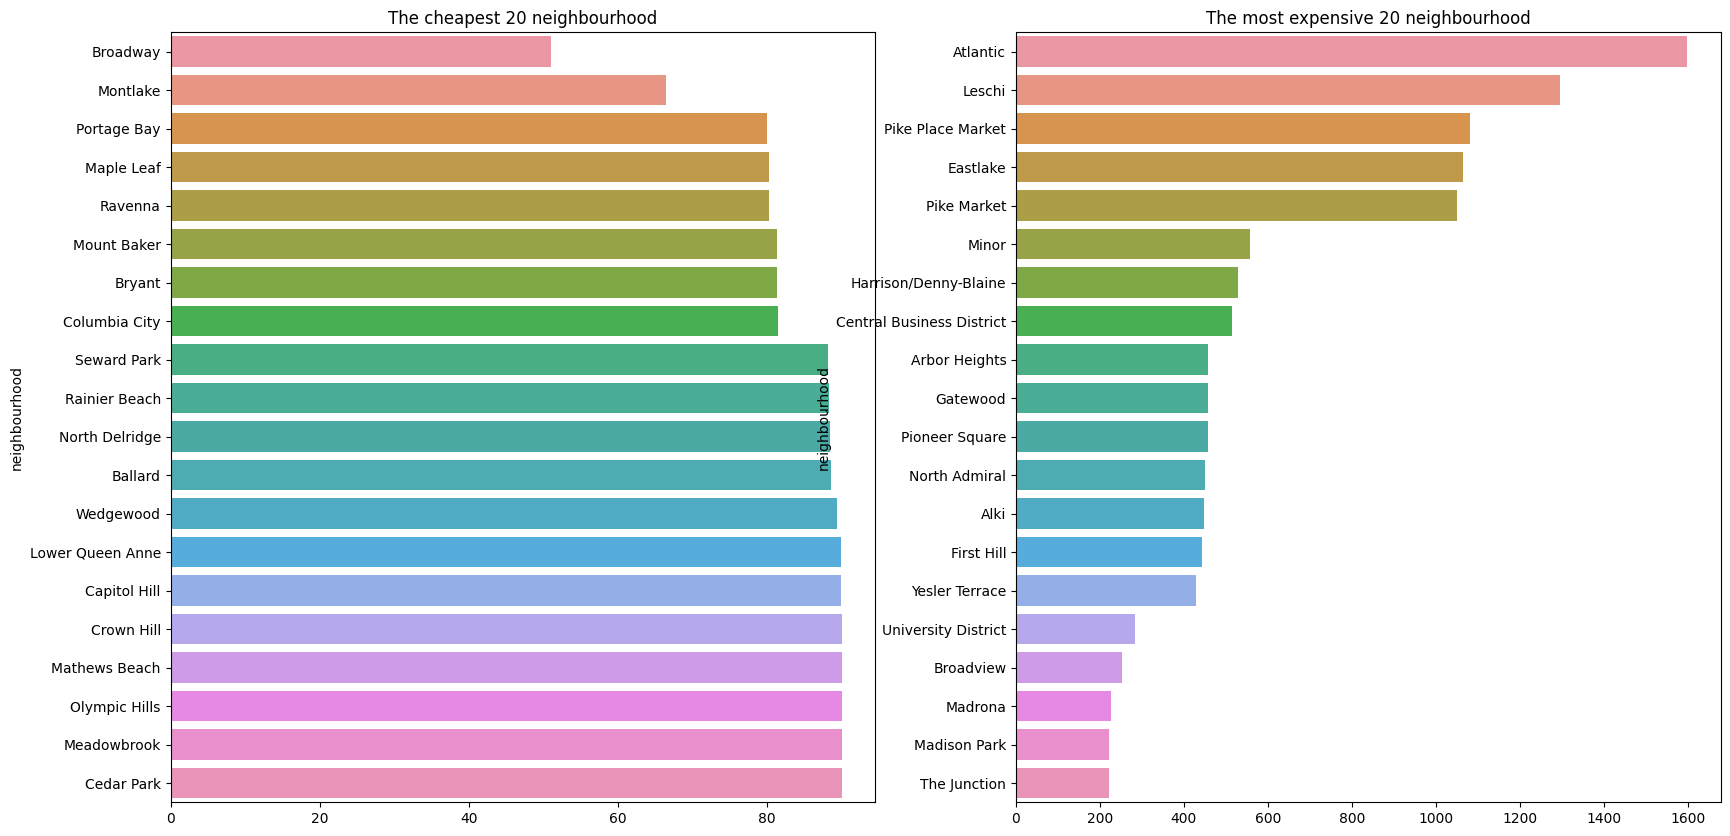

In [59]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
sns.barplot(y=least_price.index, x=least_price.values, ax=ax1)
ax1.set_title('The cheapest 20 neighbourhood')
plt.savefig('The cheapest 20 neighbourhood.png')
ax2 = fig.add_subplot(122)
sns.barplot(y=Highest_price.index, x=Highest_price.values, ax=ax2)
ax2.set_title('The most expensive 20 neighbourhood')
plt.savefig('The most expensive 20 neighbourhood.png')
plt.show()

In [51]:
least_busy = data.groupby('neighbourhood')['date'].count().sort_values(ascending=True).head(20)
busiest = data.groupby('neighbourhood')['date'].count().sort_values(ascending=False).head(20)

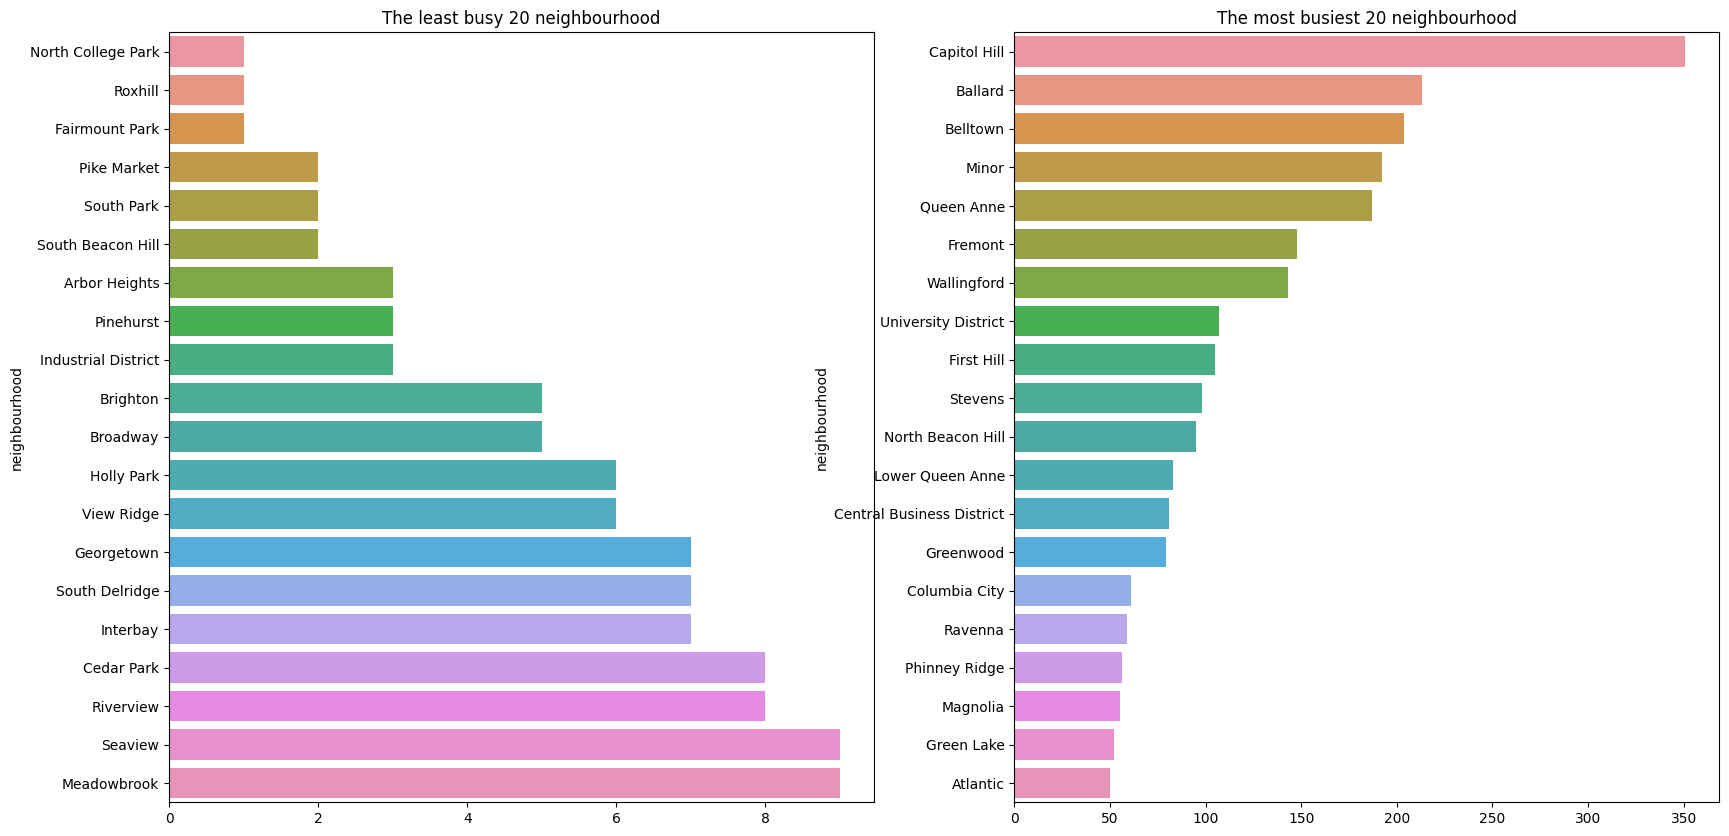

In [62]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
sns.barplot(y=least_busy.index, x=least_busy.values, ax=ax1)
ax1.set_title('The least busy 20 neighbourhood')
plt.savefig('The least busy 20 neighbourhood.png')
ax2 = fig.add_subplot(122)
sns.barplot(y=busiest.index, x=busiest.values, ax=ax2)
ax2.set_title('The most busiest 20 neighbourhood')
plt.savefig('The most busiest 20 neighbourhood.png')
plt.show()